In [34]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from IPython.display import display
from scipy import stats
from numpy import nan
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTEENN
import scipy.stats as ss
import Orange

In [35]:
# Please manually download datasets from below links and copy them to the directory of your jupyter notebook:
# https://archive.ics.uci.edu/ml/machine-learning-databases/labor-negotiations/C4.5/labor-neg.data
# https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
# https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

# Reading the input file "bank-additional-full"
dataset_labor_relation = pd.read_csv('labor-relation.csv')
dataset_congress_votes = pd.read_csv('congressional-voting-records.csv')
dataset_iris = pd.read_csv('iris.csv')
dataset_bank = pd.read_csv('bank-additional-full.csv')

In [36]:
# taking a look at dataset_labor_relation 
dataset_labor_relation.head()

,dur,wage1.wage,wage2.wage,wage3.wage,cola,hours.hrs,pension,stby_pay,shift_diff,educ_allw.boolean,holidays,vacation,lngtrm_disabil.boolean,dntl_ins,bereavement.boolean,empl_hplan,label
0,1,5,?,?,?,40,?,?,2,?,11,average,?,?,yes,?,good
1,2,4.5,5.8,?,?,35,ret_allw,?,?,yes,11,below average,?,full,?,full,good
2,?,?,?,?,?,38,empl_contr,?,5,?,11,generous,yes,half,yes,half,good
3,3,3.7,4,5,tc,?,?,?,?,yes,?,?,?,?,yes,?,good
4,3,4.5,4.5,5,?,40,?,?,?,?,12,average,?,half,yes,half,good


In [37]:
# taking a look at dataset_congress_votes 
dataset_congress_votes.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,label
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat


In [38]:
# taking a look at dataset_iris 
dataset_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
# replacing "none" and "?" with Null(nan in panda) value
dataset_labor_relation = dataset_labor_relation.replace('none', nan)
dataset_labor_relation = dataset_labor_relation.replace('?', nan)

dataset_congress_votes = dataset_congress_votes.replace('none', nan)
dataset_congress_votes = dataset_congress_votes.replace('?', nan)

dataset_iris = dataset_iris.replace('none', nan)
dataset_iris = dataset_iris.replace('?', nan)

In [40]:
# defining function count_missing_values() to count the missing values
def count_missing_values(columns):
    print((columns.isnull()).sum())

In [41]:
# calling count_missing_values() function to count the null values of dataset_labor_relation
print(count_missing_values(dataset_labor_relation.iloc[:,:]))

dur                        1
wage1.wage                 1
wage2.wage                10
wage3.wage                28
cola                      30
hours.hrs                  3
pension                   30
stby_pay                  33
shift_diff                16
educ_allw.boolean         22
holidays                   2
vacation                   3
lngtrm_disabil.boolean    24
dntl_ins                  21
bereavement.boolean       20
empl_hplan                22
label                      0
dtype: int64
None


In [42]:
# calling count_missing_values() function to count the null values of dataset_congress_votes
print(count_missing_values(dataset_congress_votes.iloc[:,:]))

handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
label                                       0
dtype: int64
None


In [43]:
# calling count_missing_values() function to count the null values of dataset_iris 
print(count_missing_values(dataset_iris.iloc[:,:]))

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
label           0
dtype: int64
None


In [44]:
# fixing the type of numerical features in dataset_labor_relation
for x in ['dur', 'wage1.wage', 'wage2.wage', 'wage3.wage', 'hours.hrs', 'stby_pay', 'shift_diff', 'holidays']: 
    dataset_labor_relation[x] = pd.to_numeric(dataset_labor_relation[x])

In [45]:
# replacing the null values of categorical features with "unknown" in dataset_labor_relation
dataset_labor_relation["cola"].fillna("unknown", inplace = True) 
dataset_labor_relation["pension"].fillna("unknown", inplace = True) 
dataset_labor_relation["educ_allw.boolean"].fillna("unknown", inplace = True) 
dataset_labor_relation["vacation"].fillna("unknown", inplace = True) 
dataset_labor_relation["lngtrm_disabil.boolean"].fillna("unknown", inplace = True) 
dataset_labor_relation["dntl_ins"].fillna("unknown", inplace = True) 
dataset_labor_relation["bereavement.boolean"].fillna("unknown", inplace = True) 
dataset_labor_relation["empl_hplan"].fillna("unknown", inplace = True) 

In [46]:
# replacing the null values of numerical features with mean in dataset_labor_relation
dataset_labor_relation["dur"].fillna((dataset_labor_relation["dur"].mean()), inplace = True)
dataset_labor_relation["wage1.wage"].fillna((dataset_labor_relation["wage1.wage"].mean()), inplace = True)
dataset_labor_relation["wage2.wage"].fillna((dataset_labor_relation["wage2.wage"].mean()), inplace = True)
dataset_labor_relation["wage3.wage"].fillna((dataset_labor_relation["wage3.wage"].mean()), inplace = True)
dataset_labor_relation["hours.hrs"].fillna((dataset_labor_relation["hours.hrs"].mean()), inplace = True)
dataset_labor_relation["stby_pay"].fillna((dataset_labor_relation["stby_pay"].mean()), inplace = True)
dataset_labor_relation["shift_diff"].fillna((dataset_labor_relation["shift_diff"].mean()), inplace = True)
dataset_labor_relation["holidays"].fillna((dataset_labor_relation["holidays"].mean()), inplace = True)

In [47]:
dataset_labor_relation.head()

,dur,wage1.wage,wage2.wage,wage3.wage,cola,hours.hrs,pension,stby_pay,shift_diff,educ_allw.boolean,holidays,vacation,lngtrm_disabil.boolean,dntl_ins,bereavement.boolean,empl_hplan,label
0,1.000000,5.000000,3.913333,3.766667,unknown,40.000000,unknown,6.142857,2.000000,unknown,11.000000,average,unknown,unknown,yes,unknown,good
1,2.000000,4.500000,5.800000,3.766667,unknown,35.000000,ret_allw,6.142857,4.583333,yes,11.000000,below average,unknown,full,unknown,full,good
2,2.102564,3.620513,3.913333,3.766667,unknown,38.000000,empl_contr,6.142857,5.000000,unknown,11.000000,generous,yes,half,yes,half,good
3,3.000000,3.700000,4.000000,5.000000,tc,37.810811,unknown,6.142857,4.583333,yes,11.105263,unknown,unknown,unknown,yes,unknown,good
4,3.000000,4.500000,4.500000,5.000000,unknown,40.000000,unknown,6.142857,4.583333,unknown,12.000000,average,unknown,half,yes,half,good


In [48]:
# replacing all null values of dataset_congress_votes with "unknown" as all features are categorical
dataset_congress_votes.iloc[:,:].fillna("unknown", inplace = True) 

In [49]:
dataset_congress_votes.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,label
0,n,y,n,y,y,y,n,n,n,y,unknown,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,unknown,republican
2,unknown,y,y,unknown,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,unknown,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,unknown,y,y,y,y,democrat


           Preprocessing of dataset_bank the same as question 1 of assignment 

In [50]:
# Converting "contact", "month", "day_of_week" from categorical to numerical using lable encoding
dataset_bank['contact'] = dataset_bank['contact'].map({'telephone':0, 'cellular':1})
dataset_bank['month'] = dataset_bank['month'].map({'mar':0, 'apr':1,'may':2,'jun':3,'jul':4,'aug':5,'sep':6,'oct':7,'nov':8,'dec':9})
dataset_bank['day_of_week'] = dataset_bank['day_of_week'].map({'mon':0, 'tue':1, 'wed':2,'thu':3,'fri':4})

In [51]:
# converting categorical attributes to dummy variables
dataset_bank = pd.get_dummies(data=dataset_bank, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome'])

In [52]:
# rempving the attributes that are highly correlated (above 98%)
corr = dataset_bank.corr()
col_corr = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if (corr.iloc[i, j] >= 0.98) and (corr.columns[j] not in col_corr):
            colname = corr.columns[i] # getting the name of column
            col_corr.add(colname)
            if colname in dataset_bank.columns:
                dataset_bank.drop(colname, axis=1, inplace = True)

In [61]:
# Defining function classifier_knn() to build k-nearset-neighbor models with different number of neighbors on the its input dataset 
def classifier_knn(X,y): 
    
    knn_model = [0]*20
    knn_accuracy_train = [0]*20
    knn_accuracy_test = [0]*20
    knn_pred_train = [0]*20
    knn_pred_test = [0]*20
    
    # Creating KNN models with different number of neighbors (from 2 to 11)
    for i in range(2,20,2):
        knn = KNeighborsClassifier(n_neighbors=i)
        ss = KFold(n_splits=10)
        for train_index, test_index in ss.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]    
            knn_model[i] = knn.fit(X_train, y_train)
            knn_pred_train[i] = knn_model[i].predict(X_train)
            knn_pred_test[i] = knn_model[i].predict(X_test)
            knn_accuracy_train[i] += accuracy_score(y_train, knn_pred_train[i])
            knn_accuracy_test[i] += accuracy_score(y_test, knn_pred_test[i])
        
    
    # Calculating the average accuracy of 10 folds for KNNs with different number of neighbors
    knn_accuracy_train = [x / 10 for x in knn_accuracy_train]
    knn_accuracy_test = [x / 10 for x in knn_accuracy_test]
    
    # Plotting cross validation accuracy of KNN classifier with different numbe rof neighbors
    models = pd.DataFrame({
                        'number of neighbors': ['2', '4', '6', '8', '10','12','14','16','18'],
                        '10-fold Cross Validation Accuracy': knn_accuracy_test[2:20:2]
    })
    
    display(models.sort_values(by='10-fold Cross Validation Accuracy', ascending=False))
    
    # returning the best number of neighbors for KNN in terms of 10-fold cross vallidation accuracy
    best_acc = max(knn_accuracy_test)
    best_k = knn_accuracy_test.index(best_acc)
    
    return best_k

In [62]:
# Defining function classifier_knn_bestk() to build a k-nearset-neighbor model with a specific number of neighbors
def classifier_knn_bestk(X,y,best_k): 
    
    knn_model = [0]*10
    knn_accuracy_train = [0]*10
    knn_accuracy_test = [0]*10
    knn_pred_train = [0]*10
    knn_pred_test = [0]*10
    
    #creating 10 folds for cross validation
    ss = KFold(n_splits=10)
    
    i = 0
    for train_index, test_index in ss.split(X, y):
        knn = KNeighborsClassifier(n_neighbors=best_k)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]    
        knn_model[i] = knn.fit(X_train, y_train)
        knn_pred_train[i] = knn_model[i].predict(X_train)
        knn_pred_test[i] = knn_model[i].predict(X_test)
        knn_accuracy_train[i] += accuracy_score(y_train, knn_pred_train[i])
        knn_accuracy_test[i] += accuracy_score(y_test, knn_pred_test[i])
        i = i + 1
        
    
    # Plotting cross validation accuracy of KNN classifiers with a specific number of neighbors
    model = pd.DataFrame({
                    'Classifier': ['K-nearest neighbor'],
                    'Best number of neighbors': best_k,
                    '10-fold cross validation accuracy': sum(knn_accuracy_test)/10
    })
    display(model)
    
    return knn_accuracy_test

In [63]:
# Defining function classifier_SVM() to build a support vector machine classifier on the its input dataset 
def classifier_svm(X,y): 
    
    svm_model = [0]*10
    svm_accuracy_train = [0]*10
    svm_accuracy_test = [0]*10
    svm_pred_train = [0]*10
    svm_pred_test = [0]*10
    
    #creating 10 folds for cross validation
    ss = KFold(n_splits=10)
    i = 0
    
    for train_index, test_index in ss.split(X, y):
        svm = SVC(kernel='linear')
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]    
        svm_model[i] = svm.fit(X_train, y_train)
        svm_pred_train[i] = svm_model[i].predict(X_train)
        svm_pred_test[i] = svm_model[i].predict(X_test)
        svm_accuracy_train[i] = accuracy_score(y_train, svm_pred_train[i])
        svm_accuracy_test[i] = accuracy_score(y_test, svm_pred_test[i])
        i = i + 1
    
    
    # Plotting cross validation accuracy of SVM classifier
    model = pd.DataFrame({
                    'Classifier': ['Support Vector Machine'],
                    '10-fold Cross Validation Accuracy': sum(svm_accuracy_test)/10
    })
    display(model)
    
    return svm_accuracy_test

In [56]:
# Defining function classifier_RF() to build random forest classifiers with different depth on the its input dataset 
def classifier_RF(X,y): 
    
    rf_model = [0]*11
    rf_accuracy_train = [0]*11
    rf_accuracy_test = [0]*11
    rf_pred_train = [0]*11
    rf_pred_test = [0]*11
    
    # Creating random forest with different depths (from 2 to 11) and see their accuracy
    for i in range(2,11):
        rf = RandomForestClassifier(max_depth=i,bootstrap=True,criterion='gini',max_features='sqrt',random_state=50)
        ss = KFold(n_splits=10)
        for train_index, test_index in ss.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]    
            rf_model[i] = rf.fit(X_train, y_train)
            rf_pred_train[i] = rf_model[i].predict(X_train)
            rf_pred_test[i] = rf_model[i].predict(X_test)
            rf_accuracy_train[i]+=accuracy_score(y_train, rf_pred_train[i])
            rf_accuracy_test[i]+=accuracy_score(y_test, rf_pred_test[i])
        
    
    # Calculating the average accuracy of 10 folds for RFs with different depth
    rf_accuracy_train = [x / 10 for x in rf_accuracy_train]
    rf_accuracy_test = [x / 10 for x in rf_accuracy_test]
    
    # Plotting cross validation accuracy of RFs classifiers with different depth
    models = pd.DataFrame({
                        'Depth': ['2', '3', '4', '5', '6', '7', '8', '9', '10'],
                        '10-fold Cross Validation Accuracy': rf_accuracy_test[2:11]
    })
    
    display(models.sort_values(by='10-fold Cross Validation Accuracy', ascending=False))
    
    # returning the best depth for RF in terms of 10-fold cross vallidation accuracy
    best_acc = max(rf_accuracy_test)
    best_depth = rf_accuracy_test.index(best_acc)
    
    return best_depth

In [57]:
# Defining function classifier_RF_best_depth to build a random forest classifier on the its input dataset 
def classifier_RF_best_depth(X,y,best_depth): 
    
    rf_model = [0]*10
    rf_accuracy_train = [0]*10
    rf_accuracy_test = [0]*10
    rf_pred_train = [0]*10
    rf_pred_test = [0]*10
    
    #creating 10 folds for cross validation
    ss = KFold(n_splits=10)
    i = 0
    
    for train_index, test_index in ss.split(X, y):
        rf = RandomForestClassifier(max_depth=best_depth,bootstrap=True,criterion='gini',max_features='sqrt',random_state=50)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]    
        rf_model[i] = rf.fit(X_train, y_train)
        rf_pred_train[i] = rf_model[i].predict(X_train)
        rf_pred_test[i] = rf_model[i].predict(X_test)
        rf_accuracy_train[i] = accuracy_score(y_train, rf_pred_train[i])
        rf_accuracy_test[i] = accuracy_score(y_test, rf_pred_test[i])
        i = i + 1
    
    
    # Plotting cross validation accuracy of RF classifier of a specific depth
    model = pd.DataFrame({
                    'Classifier': ['Random Forest'],
                    'Best Depth': best_depth,
                    '10-fold Cross Validation Accuracy': sum(rf_accuracy_test)/10
    })
    display(model)
    
    return rf_accuracy_test

                      Buiding three classifiers (KNN, SVM, RF) on dataset_labor_relation

In [58]:
# converting the categorical attributes to dummy variables
dataset_labor_relation = pd.get_dummies(data=dataset_labor_relation, columns = ['cola', 'pension', 'educ_allw.boolean', 'vacation', 'lngtrm_disabil.boolean', 'dntl_ins', 'bereavement.boolean', 'empl_hplan'])

In [59]:
# Deviding dataset_labor_relation into training_set and labels
X_labor_relation = dataset_labor_relation.drop('label',axis=1)
y_labor_relation = dataset_labor_relation.label

In [64]:
# calling function classifier_knn() to build KNN() classifiers with different number of neighbors - dataset_labor_relation 
best_k_labor_relation = classifier_knn(X_labor_relation,y_labor_relation)
# calling function classifier_knn_bestk() to store all folds of KNN with best K - dataset_labor_relation
KNN_labor_relation_acc = classifier_knn_bestk(X_labor_relation,y_labor_relation,best_k_labor_relation)

,number of neighbors,10-fold Cross Validation Accuracy
4,10,0.925
0,2,0.900
1,4,0.900
2,6,0.875
3,8,0.875
5,12,0.875
6,14,0.850
7,16,0.825
8,18,0.750


,Classifier,Best number of neighbors,10-fold cross validation accuracy
0,K-nearest neighbor,10,0.925


In [65]:
# calling function classifier_svm() to build a SVM classifier - dataset_labor_relation 
SVM_labor_relation_acc = classifier_svm(X_labor_relation,y_labor_relation)

,Classifier,10-fold Cross Validation Accuracy
0,Support Vector Machine,0.975


In [66]:
# calling function classifier_RF() to build RF classifiers with different depth - dataset_labor_relation
best_depth_rf_labor_relation = classifier_RF(X_labor_relation,y_labor_relation)

# calling function classifier_RF_best_depth() to store all folds of RF with best depth - dataset_labor_relation
RF_labor_relation_acc = classifier_RF_best_depth(X_labor_relation,y_labor_relation,best_depth_rf_labor_relation)

,Depth,10-fold Cross Validation Accuracy
1,3,0.950
2,4,0.925
3,5,0.925
4,6,0.925
5,7,0.925
6,8,0.925
7,9,0.925
8,10,0.925
0,2,0.875


,Classifier,Best Depth,10-fold Cross Validation Accuracy
0,Random Forest,3,0.95


             Buiding three classifiers (KNN, SVM, RF) on dataset_congress_votes

In [67]:
# deviding dataset_congress_votes into training_set and labels
X_congress_votes = dataset_congress_votes.drop('label',axis=1)
y_congress_votes = dataset_congress_votes.label

In [68]:
# converting categorical attributes of dataset_congress_votes to dummy variables
X_congress_votes = pd.get_dummies(data=X_congress_votes, columns = X_congress_votes.columns )

In [69]:
# calling function classifier_knn() to build KNN classifier with different number of neighbors - dataset_bank
best_k_congress_votes = classifier_knn(X_congress_votes,y_congress_votes)

# calling function classifier_knn_bestk() to store all folds of KNN with best K - dataset_bank
KNN_congress_votes_acc = classifier_knn_bestk(X_congress_votes,y_congress_votes,best_k_congress_votes)

,number of neighbors,10-fold Cross Validation Accuracy
1,4,0.933245
4,10,0.926374
2,6,0.926374
3,8,0.924049
0,2,0.923996
7,16,0.921882
6,14,0.921829
5,12,0.921776
8,18,0.917283


,Classifier,Best number of neighbors,10-fold cross validation accuracy
0,K-nearest neighbor,4,0.933245


In [70]:
# calling function classifier_svm() to build a SVM classifier - dataset_bank
SVM_congress_votes_acc = classifier_svm(X_congress_votes,y_congress_votes)

,Classifier,10-fold Cross Validation Accuracy
0,Support Vector Machine,0.95851


In [71]:
# calling function classifier_RF() to build RF classifiers with different depth - dataset_bank
best_depth_rf_congress_votes = classifier_RF(X_congress_votes,y_congress_votes)

# calling function classifier_RF_best_depth() to store all folds of RF with best depth - dataset_bank
RF_congress_votes_acc = classifier_RF_best_depth(X_congress_votes,y_congress_votes,best_depth_rf_congress_votes)

,Depth,10-fold Cross Validation Accuracy
7,9,0.960782
8,10,0.960782
6,8,0.960782
4,6,0.958510
5,7,0.958510
3,5,0.956237
1,3,0.951638
2,4,0.951638
0,2,0.949313


,Classifier,Best Depth,10-fold Cross Validation Accuracy
0,Random Forest,9,0.960782


                     Buiding three classifiers (KNN, SVM, RF) on dataset_iris

In [72]:
# deviding dataset_congress_votes into training_set and labels
X_iris = dataset_iris.drop('label',axis=1)
y_iris = dataset_iris.label

In [73]:
# calling function classifier_knn() to build KNN classifier with different number of neighbors - dataset_iris
best_k_iris = classifier_knn(X_iris,y_iris)

# calling function classifier_knn_bestk() to store all folds of KNN with best K - dataset_iris
KNN_iris_acc = classifier_knn_bestk(X_iris,y_iris,best_k_iris)

,number of neighbors,10-fold Cross Validation Accuracy
3,8,0.940000
5,12,0.933333
6,14,0.933333
0,2,0.933333
4,10,0.933333
1,4,0.926667
2,6,0.926667
8,18,0.926667
7,16,0.920000


,Classifier,Best number of neighbors,10-fold cross validation accuracy
0,K-nearest neighbor,8,0.94


In [74]:
# calling function classifier_svm() to build a SVM classifier - dataset_bank
SVM_iris_acc = classifier_svm(X_iris,y_iris)

,Classifier,10-fold Cross Validation Accuracy
0,Support Vector Machine,0.96


In [75]:
# calling function classifier_RF() to build RF classifiers with different depth - dataset_iris
best_depth_rf_iris = classifier_RF(X_iris,y_iris)

# calling function classifier_RF_best_depth() to store all folds of RF with best depth - dataset_bank
RF_iris_acc = classifier_RF_best_depth(X_iris,y_iris,best_depth_rf_iris)

,Depth,10-fold Cross Validation Accuracy
1,3,0.946667
2,4,0.946667
3,5,0.946667
4,6,0.946667
5,7,0.946667
6,8,0.946667
7,9,0.946667
8,10,0.946667
0,2,0.933333


,Classifier,Best Depth,10-fold Cross Validation Accuracy
0,Random Forest,3,0.946667


                Buiding three classifiers (KNN, SVM, RF) on dataset_bank (exactly the same as question 1)

In [76]:
# Deviding dataset_bank into training_set and labels
X_bank_original = dataset_bank.drop('y',axis=1)
y_bank_original = dataset_bank.y

In [77]:
#creating three different datasets based on three resampling methods: over_sampling, under_sampling and balance_sampling
smote_nn_blnc_smpl = SMOTEENN(random_state=42)
X_bank, y_bank = smote_nn_blnc_smpl.fit_resample(X_bank_original, y_bank_original)

In [78]:
# setting the best number of neighbors to 2 for bank dataset based on the first part of assignment - dataset_bank
best_k_bank = 2

# calling function classifier_knn_bestk() to store all folds of KNN with best K=2 - dataset_bank
KNN_bank_acc = classifier_knn_bestk(X_bank,y_bank,best_k_bank)

,Classifier,Best number of neighbors,10-fold cross validation accuracy
0,K-nearest neighbor,2,0.950928


In [79]:
# calling function classifier_svm() to build a SVM classifier - dataset_bank
SVM_bank_acc = classifier_svm(X_bank,y_bank)

,Classifier,10-fold Cross Validation Accuracy
0,Support Vector Machine,0.92288


In [80]:
# setting the best number depth of RF to 6 for bank dataset based on the first part of assignment - dataset_bank
best_depth_rf_bank = 6

# calling function classifier_RF_best_depth() to store all folds of RF with best depth=6 - dataset_bank
RF_bank_acc = classifier_RF_best_depth(X_bank,y_bank,best_depth_rf_bank)

,Classifier,Best Depth,10-fold Cross Validation Accuracy
0,Random Forest,6,0.815001


In [81]:
# Ploting the accuracy of six classifiers based on tenfold cross validation and under sampling
models = pd.DataFrame({
                        'Dataset': ['Labor Relations', 'Congress Voting','Iris', 'Portuguese Bank Marketing'],
                        'KNN': [sum(KNN_labor_relation_acc)/10, sum(KNN_congress_votes_acc)/10,sum(KNN_iris_acc)/10,sum(KNN_bank_acc)/10],
                        'SVM': [sum(SVM_labor_relation_acc)/10, sum(SVM_congress_votes_acc)/10,sum(SVM_iris_acc)/10,sum(SVM_bank_acc)/10],
                        'RF':  [sum(RF_labor_relation_acc)/10, sum(RF_congress_votes_acc)/10,sum(RF_iris_acc)/10,sum(RF_bank_acc)/10]
  })
display(models)

,Dataset,KNN,SVM,RF
0,Labor Relations,0.925000,0.97500,0.950000
1,Congress Voting,0.933245,0.95851,0.960782
2,Iris,0.940000,0.96000,0.946667
3,Portuguese Bank Marketing,0.950928,0.92288,0.815001


                  Friedman Test: Comparing KNN, SVM, RF classifiers based on their results on 4 datasets 

In [82]:
# finding the accuracy of 3 classifiers on each dataset
labor_relation_acc_list = [sum(KNN_labor_relation_acc)/10,sum(SVM_labor_relation_acc)/10,sum(RF_labor_relation_acc)/10]
congress_votes_acc_list = [sum(KNN_congress_votes_acc)/10,sum(SVM_congress_votes_acc)/10,sum(RF_congress_votes_acc)/10]
iris_acc_list = [sum(KNN_iris_acc)/10,sum(SVM_iris_acc)/10,sum(RF_iris_acc)/10]
bank_acc_list = [sum(KNN_bank_acc)/10,sum(SVM_bank_acc)/10,sum(RF_bank_acc)/10]

In [83]:
# ranking the accuracy of classifiers on each dataset
ranks_labor_relation = len(labor_relation_acc_list) + 1 - ss.rankdata(labor_relation_acc_list)
ranks_congress_votes = len(congress_votes_acc_list) + 1 - ss.rankdata(congress_votes_acc_list)
ranks_irisn = len(iris_acc_list) + 1 - ss.rankdata(iris_acc_list)
ranks_bank_relation = len(bank_acc_list) + 1 - ss.rankdata(bank_acc_list)

In [84]:
# Ploting the rank of classifiers on each dataset

# changing the order of ranks to starts from 1 for the highest
KNN_ranks = [ranks_labor_relation[0],ranks_congress_votes[0],ranks_irisn[0],ranks_bank_relation[0]]
SVM_ranks = [ranks_labor_relation[1],ranks_congress_votes[1],ranks_irisn[1],ranks_bank_relation[1]]
RF_ranks =  [ranks_labor_relation[2],ranks_congress_votes[2],ranks_irisn[2],ranks_bank_relation[2]]

models = pd.DataFrame({
                        'Dataset': ['Labor Relations', 'Congress Voting','Iris', 'Portuguese Bank Marketing', 'Avg Rank'],
                        'KNN Rank': KNN_ranks + [sum(KNN_ranks)/4],
                        'SVM Rank': SVM_ranks + [sum(SVM_ranks)/4],
                        'RF Rank':  RF_ranks +  [sum(RF_ranks)/4]
  })
display(models)

,Dataset,KNN Rank,SVM Rank,RF Rank
0,Labor Relations,3.0,1.0,2.0
1,Congress Voting,3.0,2.0,1.0
2,Iris,3.0,1.0,2.0
3,Portuguese Bank Marketing,1.0,2.0,3.0
4,Avg Rank,2.5,1.5,2.0


In [114]:
# Calculating the Friedman Statistic

# setting the required parameters
k = 3    # number of classifiers
n = 4    # number of datasets
significance_level = 0.95
Friedman_critical_value = 6.5

# calculating the average rank
rank_mean = (sum(KNN_ranks) + sum(SVM_ranks) + sum(RF_ranks))/ (n*k)

# calculating the Friedman statistic
Friedman_statistic = (pow(sum(KNN_ranks)/4 - rank_mean,2) + pow(sum(SVM_ranks)/4 - rank_mean,2) + pow(sum(RF_ranks)/4 - rank_mean,2)) * n
print("Friedman_statistic: {0}.".format(Friedman_statistic))
print("Firedman Critical Value: {0}.".format(Friedman_critical_value))

if(Friedman_statistic<Friedman_critical_value):
    print("\nNull hypothesis is accepted and we can say all classifiers perform equally")
else:
    print("Null hypothesis is rejected and we can say there is significant difference between classifiers")

Friedman_statistic: 2.0.
Firedman Critical Value: 6.5.

Null hypothesis is accepted and we can say all classifiers perform equally


The Critical value for the Friedman test for n=4, k=3 and significance level=95% (alpha=5%) is 6.5.
As Friedman_statistic is less than 6.5, null hypothesis is accepted and we can say all classifiers have the same performance

                                         Nomenyi Diagram

Critical Difference: 1.657.


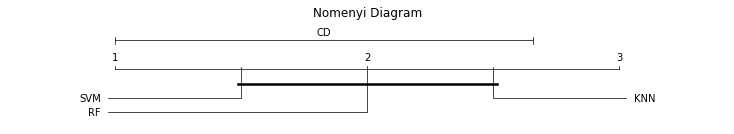

In [103]:
# setting the required parameters for Nomenyi diagram
k = 3    # number of classifiers
n = 4    # number of datasets
significance_level = 0.95
q = 2.343
classifiers_names = ["KNN", "SVM", "RF"]

# calculating the criticial difference
critical_diff = q * (np.sqrt(k*(k+1)/(6*n)))
print("Critical Difference: {0}.".format("{:.3f}".format(critical_diff)))

# calculating the average of ranks for each classifiers
classifiers_avg_ranks =  [sum(KNN_ranks)/4,sum(SVM_ranks)/4,sum(RF_ranks)/4]

# plotting Nomonyi diagram
Orange.evaluation.graph_ranks(classifiers_avg_ranks, classifiers_names, cd=critical_diff, width=10, textspace=1.5)
plt.title("Nomenyi Diagram")
plt.show()

The Nomonyi diagram shows that all differences between classifiers are less than the critical value which is illustrated at the top of the diagram. So, none of the classifiers outperforms the others (the same as the conclusion we got from Friedman test).